In [1]:
# Healthcare E-commerce Product Analytics
# Objective: Analyze user behavior, retention, and experiments
# Tools: Python (Pandas, NumPy, Matplotlib)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv(
    r"C:\Users\Kanchan\OneDrive\Documents\Healthcare_product_analysis\Data\healthcare_ecommerce_analysis_csv.csv"
)

df.head()                 

,order_id,user_id,order_date,days_since_last_order,product_id,product_category,order_value,is_repeat_order
0,1,5239,2023-04-25,NaN,58,Pain Relief,1151.09,0
1,2,1144,2023-10-30,NaN,378,Pain Relief,1063.54,0
2,3,3457,2023-09-16,NaN,17,Pain Relief,276.49,0
3,4,4932,2023-08-18,15.0,14,Skin Care,418.43,1
4,5,4828,2023-12-24,NaN,143,Digestive Health,1323.56,0


In [9]:
df.shape


(50000, 8)

In [17]:
df.columns
df.head()

,order_id,user_id,order_date,days_since_last_order,product_id,product_category,order_value,is_repeat_order
0,1,5239,2023-04-25,NaN,58,Pain Relief,1151.09,0
1,2,1144,2023-10-30,NaN,378,Pain Relief,1063.54,0
2,3,3457,2023-09-16,NaN,17,Pain Relief,276.49,0
3,4,4932,2023-08-18,15.0,14,Skin Care,418.43,1
4,5,4828,2023-12-24,NaN,143,Digestive Health,1323.56,0


In [15]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['is_repeat_order'] = df['is_repeat_order'].astype(int)
df.head()

,order_id,user_id,order_date,days_since_last_order,product_id,product_category,order_value,is_repeat_order
0,1,5239,2023-04-25,NaN,58,Pain Relief,1151.09,0
1,2,1144,2023-10-30,NaN,378,Pain Relief,1063.54,0
2,3,3457,2023-09-16,NaN,17,Pain Relief,276.49,0
3,4,4932,2023-08-18,15.0,14,Skin Care,418.43,1
4,5,4828,2023-12-24,NaN,143,Digestive Health,1323.56,0


In [19]:
df['first_order_date'] = (
    df.groupby('user_id')['order_date']
      .transform('min')
)


0       2023-02-01
1       2023-01-13
2       2023-03-01
3       2023-04-11
4       2023-03-04
           ...    
49995   2023-01-31
49996   2023-02-13
49997   2023-01-05
49998   2023-01-16
49999   2023-02-13
Name: first_order_date, Length: 50000, dtype: datetime64[ns]

In [20]:
df['cohort_month'] = df['first_order_date'].dt.to_period('M')
df['order_month'] = df['order_date'].dt.to_period('M')


In [21]:
df['cohort_index'] = (
    (df['order_month'] - df['cohort_month'])
    .apply(lambda x: x.n)
)


In [22]:
cohort_data = (
    df.groupby(['cohort_month', 'cohort_index'])['user_id']
      .nunique()
      .reset_index()
)


In [23]:
cohort_pivot = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='user_id'
)

cohort_pivot


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2023-01,3244.0,1284.0,1337.0,1306.0,1314.0,1308.0,1318.0,1299.0,1295.0,1366.0,1304.0,1333.0,48.0
2023-02,1819.0,760.0,727.0,721.0,737.0,751.0,739.0,724.0,733.0,733.0,709.0,24.0,NaN
2023-03,1205.0,535.0,509.0,474.0,496.0,526.0,498.0,493.0,495.0,475.0,21.0,NaN,NaN
2023-04,676.0,294.0,265.0,283.0,276.0,278.0,276.0,254.0,262.0,15.0,NaN,NaN,NaN
2023-05,456.0,181.0,182.0,175.0,207.0,199.0,179.0,190.0,3.0,NaN,NaN,NaN,NaN
2023-06,227.0,106.0,92.0,97.0,87.0,83.0,94.0,3.0,NaN,NaN,NaN,NaN,NaN
2023-07,148.0,59.0,57.0,54.0,70.0,60.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,88.0,36.0,37.0,35.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,61.0,22.0,22.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

retention.round(2)


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2023-01,1.0,0.40,0.41,0.40,0.41,0.40,0.41,0.40,0.40,0.42,0.40,0.41,0.01
2023-02,1.0,0.42,0.40,0.40,0.41,0.41,0.41,0.40,0.40,0.40,0.39,0.01,NaN
2023-03,1.0,0.44,0.42,0.39,0.41,0.44,0.41,0.41,0.41,0.39,0.02,NaN,NaN
2023-04,1.0,0.43,0.39,0.42,0.41,0.41,0.41,0.38,0.39,0.02,NaN,NaN,NaN
2023-05,1.0,0.40,0.40,0.38,0.45,0.44,0.39,0.42,0.01,NaN,NaN,NaN,NaN
2023-06,1.0,0.47,0.41,0.43,0.38,0.37,0.41,0.01,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.40,0.39,0.36,0.47,0.41,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.41,0.42,0.40,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.36,0.36,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1000x500 with 0 Axes>

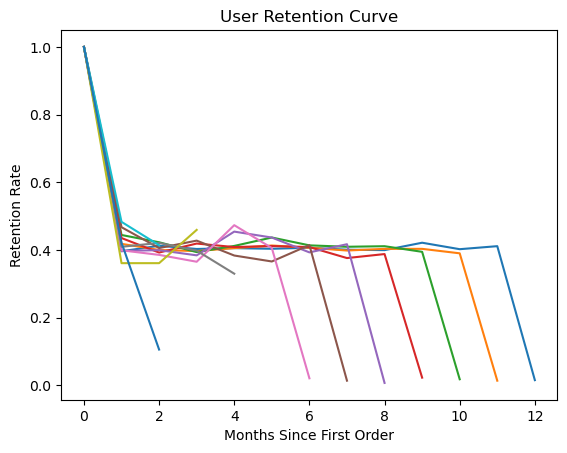

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
retention.T.plot(legend=False)
plt.xlabel("Months Since First Order")
plt.ylabel("Retention Rate")
plt.title("User Retention Curve")
plt.show()


In [26]:
df['cohort_index'].value_counts().sort_index()


cohort_index
0     10195
1      4209
2      4228
3      4075
4      4119
5      4142
6      3981
7      3789
8      3558
9      3284
10     2646
11     1726
12       48
Name: count, dtype: int64

In [27]:
df.groupby('product_category')['is_repeat_order'].mean().sort_values(ascending=False)


product_category
Heart Care          0.506215
Pain Relief         0.503326
Skin Care           0.500000
Vitamins            0.498728
Cold & Cough        0.498598
Digestive Health    0.497908
Diabetes Care       0.493058
Name: is_repeat_order, dtype: float64